<a href="https://colab.research.google.com/github/gunurusreekethana4/sreekethana_INFO5371_SPRING2023/blob/main/INFO5731_Assignment_Three_fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [ ]:
import pandas as pd
import io
'''from google.colab import drive
drive.mount('/content/gdrive')'''


import pandas as pd

# load data
df = pd.read_csv('sample_data/tweet.csv')
df.head()

# display the data
df.head()



,id,text
0,1.64E+18,"Helloooooooooo!!! Anyone there, click in link ..."
1,1.64E+18,Love is a beautiful dream. - William Sharp (di...
2,1.64E+18,RT @Sammyybee1: In her Uniqueness 📸❤️📸\n\nI Br...
3,1.64E+18,"RT @EileanIdhe: A busy, but productive day! We..."
4,1.64E+18,RT @petale_le: Le rouge comme l’expression de ...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#1. Remove noise such as special characters
import pandas as pd
import re
import os

df['text'] = df['text'].apply(lambda x: str(x))  # Convert to string
df['text'] = df['text'].apply(lambda x: re.sub('[^A-Za-z0-9\s]+', '', x))

#2. Remove numbers.
df['text'] = df['text'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))

#3. Remove stopwords by using the stopwords list.
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
df['stopwords'] = df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['text','stopwords']].head()
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

#4. Lowercase all texts
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#5. Stemming.
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#6. Lemmatization.
from textblob import Word
import nltk
nltk.download('wordnet')
nltk.download("omw-1.4")
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['text'].head()

print(df['text'].head())

# check if the file exists in the current directory
# print(os.getcwd())
# if os.path.exists('tweet.csv'):
#     # download the file
#     files.download('/drive/MyDrive/tweet.csv')
# else:
#     print("The file 'tweet.csv' does not exist in the current directory.")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


0    helloooooooooo anyone click link httpstcolubgq...
1    love beautiful dream william sharp disagreelov...
2    rt sammyybee in uniqueness i brought flower le...
3    rt eileanidhe a busy productive day we lovely ...
4    rt petalele le rouge comme lexpression de lamo...
Name: text, dtype: object


In [ ]:
import pandas as pd
from nltk import ngrams
from collections import Counter



# Tokenize the text and generate the N-grams
tokens = df['text'].apply(lambda x: x.lower().split())
trigrams = tokens.apply(lambda x: list(ngrams(x, 3)))

# Count the frequency of each trigram
trigram_counts = Counter([item for sublist in trigrams for item in sublist])

# Print the top 10 most frequent trigrams
print(trigram_counts.most_common(10))


[(('germanshepherd', 'gsd', 'dog'), 141), (('gsd', 'dog', 'dogsoftwitter'), 141), (('dog', 'dogsoftwitter', 'cute'), 141), (('dogsoftwitter', 'cute', 'photography'), 141), (('cute', 'photography', 'photo'), 141), (('photography', 'photo', 'trending'), 141), (('photo', 'trending', 'love'), 141), (('trending', 'love', 'usa'), 141), (('love', 'usa', 'new'), 141), (('rt', 'german', 'germanshepherd'), 139)]


In [ ]:
import pandas as pd
import nltk
from nltk.util import ngrams
import nltk
nltk.download('punkt')



# Tokenize the text into individual words
df['tokens'] = df['text'].apply(nltk.word_tokenize)

# Generate all bigrams in the text
df['bigrams'] = df['tokens'].apply(lambda x: list(ngrams(x, 2)))

# Count the frequency of each word in the text
word_freq = {}
for tokens in df['tokens']:
    for token in tokens:
        if token in word_freq:
            word_freq[token] += 1
        else:
            word_freq[token] = 1

# Calculate the probability of each bigram
bigram_prob = {}
for bigrams in df['bigrams']:
    for bigram in bigrams:
        w2, w1 = bigram
        count_w2_w1 = bigrams.count(bigram)
        count_w2 = word_freq[w2]
        bigram_prob[bigram] = count_w2_w1 / count_w2

# Print the probabilities for all bigrams
for bigram, prob in bigram_prob.items():
    print(f'{bigram}: {prob}')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Streaming output truncated to the last 5000 lines.
('outfit', 'httpstcoltdlyacimy'): 0.047619047619047616
('late', 'grunge'): 0.05263157894736842
('grunge', 'white'): 1.0
('white', 'httpstconyxxeytl'): 0.038461538461538464
('httpstconyxxeytl', 'sorry'): 1.0
('music', 'httpstcompirytpv'): 0.00411522633744856
('rt', 'kevindomenic'): 0.00020048115477145148
('kevindomenic', 'he'): 1.0
('he', 'wipe'): 0.009433962264150943
('wipe', 'every'): 0.2
('every', 'tear'): 0.013333333333333334
('tear', 'eye'): 0.2
('eye', 'there'): 0.02702702702702703
('there', 'death'): 0.009174311926605505
('death', 'mourning'): 0.05263157894736842
('mourning', 'cry'): 0.5
('cry', 'pain'): 0.058823529411764705
('pain', 'old'): 0.047619047619047616
('old', 'order'): 0.05
('inspirational', 'httpstcobexlxrahs'): 0.03225806451612903
('old', 'httpstcoqinoevrgl'): 0.05
('love', 'httpstcolvmloliu'): 0.00016482610845557937
('cba', 'fabuloso'): 0.25
('fabuloso', 'cordoba'): 0.25
('cordoba', 'provida'): 0.25
('provida', 'bue

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define function to extract noun phrases from a text
def extract_noun_phrases(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tagged_tokens = nltk.pos_tag(word_tokenize(text))
    noun_phrases = []
    for i in range(len(tagged_tokens)):
        if tagged_tokens[i][1].startswith('NN'):
            np = tagged_tokens[i][0]
            j = i + 1
            while j < len(tagged_tokens) and tagged_tokens[j][1].startswith('NN'):
                np += ' ' + tagged_tokens[j][0]
                j += 1
            np = lemmatizer.lemmatize(np.lower())
            if np not in stop_words:
                noun_phrases.append(np)
    return noun_phrases

# Read the reviews from the file
with open('sample_data/tweet.csv') as f:
    reviews = f.read().splitlines()

# Extract noun phrases from each review and calculate their frequencies
all_noun_phrases = defaultdict(int)
review_noun_phrases = []
for review in reviews:
    noun_phrases = extract_noun_phrases(review)
    review_noun_phrases.append(noun_phrases)
    for np in noun_phrases:
        all_noun_phrases[np] += 1

# Calculate the maximum frequency of each noun phrase
max_frequencies = {}
for np in all_noun_phrases:
    max_frequencies[np] = max([all_noun_phrases[np] for np_list in review_noun_phrases])

# Calculate the relative probabilities of each review
review_probs = []
for i in range(len(reviews)):
    probs = {}
    for np in review_noun_phrases[i]:
        probs[np] = all_noun_phrases[np] / max_frequencies[np]
    review_probs.append(probs)

# Print the results in a table
print('\t' + '\t'.join(all_noun_phrases.keys()))
for i in range(len(reviews)):
    row = [str(i+1)]
    for np in all_noun_phrases:
        if np in review_probs[i]:
            row.append(str(review_probs[i][np]))
        else:
            row.append('0')
    print('\t'.join(row))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


	id	text	helloooooooooo	anyone	click	link	//t.co/lubgqlksz1	barbiethemovie… https	http	//t.co/vzcnljcuen	love	dream	william sharp	sharp	disagree-love	huston	rt @ sammyybee1	@ sammyybee1	sammyybee1	uniqueness 📸❤️📸	📸❤️📸	flower	world 🌺	🌺	men	bid war…i ’ ll foreve…	war…i ’ ll foreve…	’ ll foreve…	ll foreve…	foreve…	rt @ eileanidhe	@ eileanidhe	eileanidhe	day	mass	medium	rt @ petale_le	@ petale_le	petale_le	le rouge comme l ’ expression	rouge comme l ’ expression	comme l ’ expression	l ’ expression	’ expression	expression	l ’ état pur ❤️	’ état pur ❤️	état pur ❤️	pur ❤️	❤️	livrons	émotions	note florale	florale	love…	memories…	rebamcentire	//t.co/0q6y29f4im	créez	émotions dans	dans	aimez par	par	surprise florale	seduction	fl…	jack fiore	fiore	este	és	mi oc y mi foto	oc y mi foto	y mi foto	mi foto	foto	perfil	por	//t.co/w3wjxssppf	rt @ karijoys	@ karijoys	karijoys	every act	act	kindness ..	..	joytrain	joy	peace	blessing	gratitude	mentalhealth	mindfulness	goldenh…	rt @ malysia	@ malysia	malysi

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [ ]:
# Write your code here

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity



# Preprocess the data
stop_words = set(stopwords.words('english'))
preprocessed_reviews = []
for texts in df['text']:
    # Tokenize the texts
    tokens = word_tokenize(texts.lower())
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Join the tokens back into a string
    preprocessed_review = ' '.join(tokens)
    preprocessed_reviews.append(preprocessed_review)

# Compute TF-IDF weights
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_reviews)

# Define the query
query = "An Outstanding movie with a haunting performance and best character development"

# Preprocess the query
query_tokens = word_tokenize(query.lower())
query_tokens = [token for token in query_tokens if token not in stop_words]
query = ' '.join(query_tokens)

# Compute the cosine similarity between the query and the documents
query_tfidf = tfidf_vectorizer.transform([query])
cosine_similarities = cosine_similarity(query_tfidf, tfidf_matrix).flatten()

# Rank the documents by their similarity to the query
document_scores = list(zip(range(len(cosine_similarities)), cosine_similarities))
document_scores.sort(key=lambda x: x[1], reverse=True)

# Print the top 10 most similar documents to the query
for i in range(10):
    document_index = document_scores[i][0]
    document_score = document_scores[i][1]
    print(f"Document {document_index + 1} - Score: {document_score}")
    print(df.loc[document_index, 'text'])
    print("\n")








Document 9761 - Score: 0.21697498291187026
Best web development stack for your app 2022
Read more: https://t.co/Ksfyd6JJfN
#namasteui #followforfollow… https://t.co/339PXsbHx1


Document 7192 - Score: 0.21401038624772825
The Man Who Had Everything, 1920 
#movie #love #beautiful #classic #art #film

Full Movie: https://t.co/8eXCQWPU1L… https://t.co/ugscDRoqJr


Document 8015 - Score: 0.19673160805492376
#Movie #Movies #PopcornReviewss #Webseries #PopcornMovieReviews #Action #Hindi #AmazonMiniTV #Reviews #movie… https://t.co/zK9MZFrLf9


Document 2973 - Score: 0.1889742319078762
The Electric House, 1922 starring Buster Keaton 
#movie #love #beautiful #classic #art #film

Full Movie:… https://t.co/OHLWKhDkmJ


Document 8696 - Score: 0.17637277082840244
One of the best love story
Movie
#Majili 
#NagaChaitanya 
#Samantha 
@Samanthaprabhu2 
@chay_akkineni 
#love https://t.co/VCVGIeNf0E


Document 6341 - Score: 0.17596754307627216
RT @Raghava_2001: One of the best love story
Movie
#Majili 
#N

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128158 (\N{REVOLVING HEARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128154 (\N{GREEN HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127808 (\N{FOUR LE

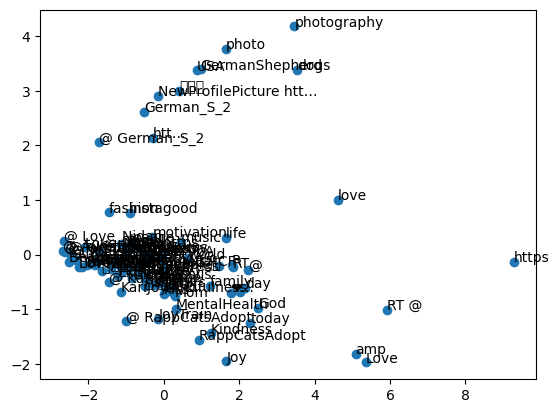

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.chunk import RegexpParser
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

# read in the data
df = pd.read_csv('sample_data/tweet.csv')

# check for missing values and replace with empty strings
df['text'].fillna('', inplace=True)

# extract all noun phrases from each review
noun_phrases = []
for review in df['text']:
    tokens = word_tokenize(review)
    pos_tags = nltk.pos_tag(tokens)
    noun_chunks = []
    for i in range(len(pos_tags)):
        if pos_tags[i][1].startswith('NN'):
            noun_chunks.append(pos_tags[i][0])
            if i < len(pos_tags)-1 and pos_tags[i+1][1].startswith('NN'):
                noun_chunks[-1] += ' ' + pos_tags[i+1][0]
    noun_phrases.append(noun_chunks)

# convert float values to strings
sentences = [[str(word) for word in sentence] for sentence in noun_phrases]

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4)

# Save the model
model.save("word2vec.model")

# Visualize the Word2Vec model
words = list(model.wv.index_to_key)[:100]
X = model.wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# plot the scatter plot of the words
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [ ]:
# The GitHub link of your final csv file
Select a set of reviews (e.g., tweets, product reviews, movie reviews, etc.) that you want to use for sentiment analysis.
Read each review carefully and decide whether it expresses a positive, negative, or neutral sentiment.
Create a csv file with three columns: document_id, clean_text, and sentiment.
Fill in the document_id column with a unique identifier for each review.
Fill in the clean_text column with the text of each review, after pre-processing it (e.g., removing stop words, punctuation, etc.).
Fill in the sentiment column with the sentiment label you assigned to each review (e.g., positive, negative, or neutral).
Save the annotated dataset into a csv file.
Upload the csv file to GitHub or any other online repository.
Share the link to the annotated dataset with your instructor or submit it as part of your assignment.


# Link: 
https://github.com/gunurusreekethana4/sreekethana_INFO5371_SPRING2023/blob/main/tweet_sentiment_analysis.xlsx



